<a href="https://colab.research.google.com/github/AnujKrishnaPhuyal/LinearRegression/blob/main/lineraRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

In [6]:
torch.__version__



'2.0.0+cu118'

In [110]:
weight = 0.3
bias = 0.2
X = torch.arange(1,9,0.1)
y = weight+bias*X
len(y)

80

In [111]:
train_split = int(0.75*len(X))
train_split


60

In [112]:
X_train,y_train = X[:train_split],y[:train_split]
len(X_train)
X_train.shape

torch.Size([60])

In [10]:
y_train.shape


torch.Size([33])

In [100]:
X_test,y_test = X[train_split:],y[train_split:]
len(X_test)

11

In [65]:
def pred_plot(train_data = X_train,
              train_labels = y_train,
              test_data=X_test,
              test_labels = y_test,
              prediction = None):
  # plt.subplot(1,2,1)
  plt.scatter(train_data,train_labels,c="r",label="training data")
  # plt.subplot(1,2,2)
  plt.scatter(test_data,test_labels,c="g", label="test data")

  if prediction is not None:
    plt.scatter(test_data,prediction,label="prediction")
  plt.legend()
  plt.show()

In [57]:
X_test.dtype

torch.float32

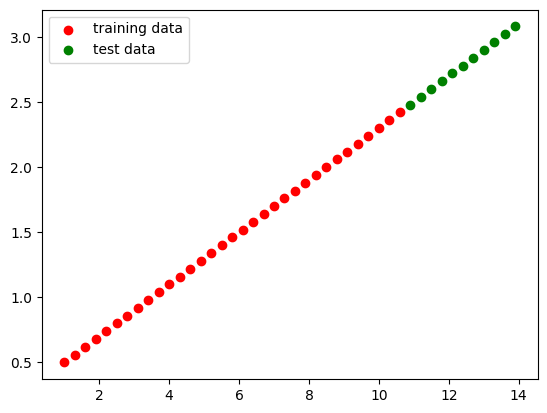

In [13]:
pred_plot()

In [47]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bais = nn.Parameter(torch.randn(1,requires_grad=True,
                                            dtype=torch.float))

  def forward(self,x:torch.Tensor):
      return self.bais+self.weights*x



In [48]:
model_1=LinearRegressionModel()

In [49]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.2563])), ('bais', tensor([0.9550]))])

In [50]:
y_pred = model_1(X_test)

In [59]:
y_pred


tensor([3.7485, 3.8254, 3.9022, 3.9791, 4.0560, 4.1329, 4.2098, 4.2867, 4.3636,
        4.4404, 4.5173], grad_fn=<AddBackward0>)

In [63]:
with torch.inference_mode():
  y_test_pred = model_1(X_test)
y_test_pred

tensor([3.7485, 3.8254, 3.9022, 3.9791, 4.0560, 4.1329, 4.2098, 4.2867, 4.3636,
        4.4404, 4.5173])

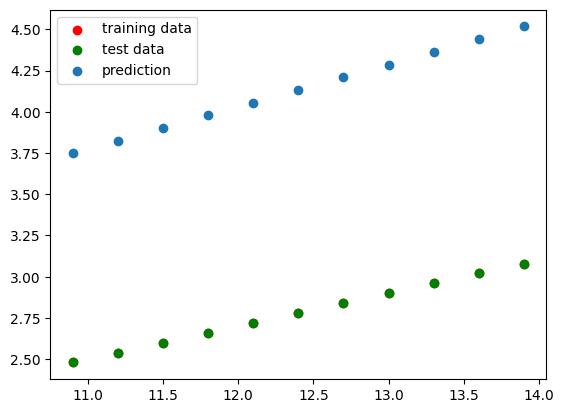

In [67]:
pred_plot(X_test,y_test,prediction=y_test_pred)

In [101]:
loss_fn = nn.L1Loss()

In [102]:
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.01)

In [113]:
epochs = 100
train_loss = []
test_loss_values=[]
epoch_count =[]

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test)


  if epoch % 10==0:
      epoch_count.append(epoch)
      train_loss.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"epoch:{epoch},pred_loss:{loss},test_loss={test_loss}")


epoch:0,pred_loss:0.028151284903287888,test_loss=0.5322566032409668
epoch:10,pred_loss:0.028151284903287888,test_loss=0.5322566032409668
epoch:20,pred_loss:0.028151284903287888,test_loss=0.5322566032409668
epoch:30,pred_loss:0.028151284903287888,test_loss=0.5322566032409668
epoch:40,pred_loss:0.028151284903287888,test_loss=0.5322566032409668
epoch:50,pred_loss:0.028151284903287888,test_loss=0.5322566032409668
epoch:60,pred_loss:0.028151284903287888,test_loss=0.5322566032409668
epoch:70,pred_loss:0.028151284903287888,test_loss=0.5322566032409668
epoch:80,pred_loss:0.028151284903287888,test_loss=0.5322566032409668
epoch:90,pred_loss:0.028151284903287888,test_loss=0.5322566032409668


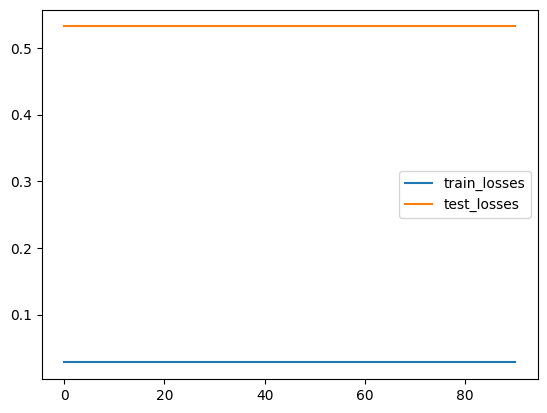

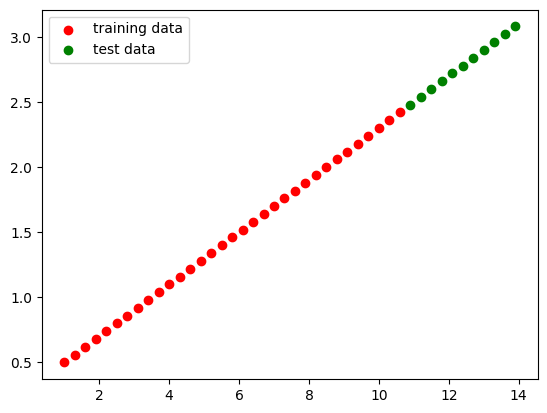

In [117]:
plt.plot(epoch_count,train_loss,label="train_losses")
plt.plot(epoch_count,test_loss_values,label="test_losses")
plt.legend()
plt.show()
pred_plot()


In [118]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.1928])), ('bais', tensor([0.3565]))])